In [1]:
import os
from os import environ
import pandas as pd
import numpy as np
import geopandas as gpd
from sodapy import Socrata
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [2]:
from shapely import wkt
from shapely.geometry import Point
import folium
import plotly.graph_objects as go

In [3]:
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.kernel_ridge import KernelRidge

In [5]:
import warnings
warnings.filterwarnings("ignore")

Analysis of different times of the day

In [ ]:
morn_aqi = pd.read_csv('morn_aqi.csv')

In [35]:
noon_aqi = pd.read_csv('noon_aqi.csv')

In [36]:
even_aqi = pd.read_csv('even_aqi.csv')

In [37]:
night_aqi = pd.read_csv('night_aqi.csv')

In [82]:
morn_aqi['region_id'] = morn_aqi['region_id'].astype(str)
noon_aqi['region_id'] = noon_aqi['region_id'].astype(str)
even_aqi['region_id'] = even_aqi['region_id'].astype(str)
night_aqi['region_id'] = night_aqi['region_id'].astype(str)

In [88]:
combined1 = morn_aqi.merge(noon_aqi, on='region_id', copy=False)

In [91]:
combined1 = combined1.merge(even_aqi, on='region_id')

In [95]:
combined1 = combined1.merge(night_aqi, on='region_id')

In [ ]:
colaqi = ['region_id', 'aqi_morn','aqi_noon','aqi_even','aqi_night']

In [97]:
combined1 = combined1[colaqi]

In [99]:
combined1.head(3)

region_id  aqi_morn   aqi_noon   aqi_even  aqi_night
0  36061002400      83.0  78.000000  71.666667  71.333333
1  36061011202      75.0  63.000000  66.333333  68.000000
2  36061004400      75.0  66.666667  66.000000  65.666667

In [100]:
combined1 = tracts.merge(combined1, on='region_id')

MorningAir

In [6]:
census_tract_path = '/Users/Albert/Jupyter/us_tracts/us_tract.shp'
tracts = gpd.read_file(census_tract_path)

In [7]:
morn_30 = pd.read_csv('/Users/Albert/Jupyter/ManhattanAirMorning6.csv')

In [8]:
morn_31 = pd.read_csv('/Users/Albert/Jupyter/ManhattanAir31Morning.csv')

In [9]:
morn_01 = pd.read_csv('/Users/Albert/Jupyter/ManhattanAir01Morn.csv')

In [10]:
morn = pd.DataFrame()

In [11]:
morn_30['aqi'] = morn_30.rename(columns = {'aqi':'aqi30'}, inplace=True)

In [12]:
morn_31['aqi'] = morn_31.rename(columns = {'aqi':'aqi31'}, inplace=True)

In [13]:
morn_01['aqi'] = morn_01.rename(columns = {'aqi':'aqi01'}, inplace=True)

In [14]:
morn = morn_30.merge(morn_31, on='region_id')

In [15]:
morn = morn.merge(morn_01, on='region_id')

In [16]:
cols = ['region_id','aqi30','aqi31','aqi01']

In [17]:
morn = morn[cols]

In [18]:
morn_aqi = pd.DataFrame()

In [19]:
morn_aqi = morn.set_index('region_id').mean(axis=1).rename('aqi_morn').reset_index()

In [20]:
morn_aqi['region_id'] = morn_aqi['region_id'].astype(str)

In [21]:
morn_aqi.head(10)

region_id   aqi_morn
0  36061002400  83.000000
1  36061011202  75.000000
2  36061004400  75.000000
3  36061003900  73.333333
4  36061006000  83.333333
5  36061009200  73.666667
6  36061027300  81.000000
7  36061031100  75.666667
8  36061003200  77.666667
9  36061001502  72.333333

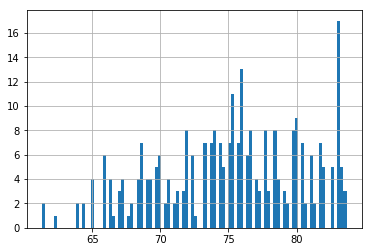

In [22]:
morn_aqi['aqi_morn'].hist(bins=100)

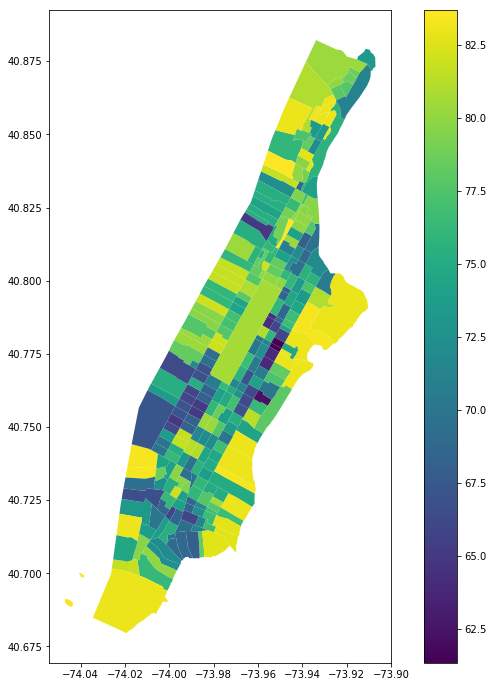

In [27]:
tracts.merge(morn_aqi, on='region_id').plot(column='aqi_morn', figsize=(12, 12), legend=True)

Folium Map Morning

In [184]:
combined = tracts.merge(morn_aqi, on='region_id')

In [185]:
combined

region_id  STATEFP  COUNTYFP  TRACTCE        GEOID    NAME  \
0    36061002400       36        61     2400  36061002400   24.00   
1    36061011202       36        61    11202  36061011202  112.02   
2    36061004400       36        61     4400  36061004400   44.00   
3    36061003900       36        61     3900  36061003900   39.00   
4    36061006000       36        61     6000  36061006000   60.00   
5    36061009200       36        61     9200  36061009200   92.00   
6    36061027300       36        61    27300  36061027300  273.00   
7    36061031100       36        61    31100  36061031100  311.00   
8    36061003200       36        61     3200  36061003200   32.00   
9    36061001502       36        61     1502  36061001502   15.02   
10   36061018100       36        61    18100  36061018100  181.00   
11   36061028300       36        61    28300  36061028300  283.00   
12   36061001600       36        61     1600  36061001600   16.00   
13   36061005400       36        61     5400  36061005400   54.00   
14   36061021000       36        61    21000  36061021000  210.00   
15   36061010400       36        61    10400  36061010400  104.00   
16   36061011402       36        61    11402  36061011402  114.02   
17   36061013200       36        61    13200  36061013200  132.00   
18   36061009600       36        61     9600  36061009600   96.00   
19   36061012700       36        61    12700  36061012700  127.00   
20   36061005501       36        61     5501  36061005501   55.01   
21   36061016300       36        61    16300  36061016300  163.00   
22   36061011000       36        61    11000  36061011000  110.00   
23   36061006200       36        61     6200  36061006200   62.00   
24   36061012000       36        61    12000  36061012000  120.00   
25   36061023700       36        61    23700  36061023700  237.00   
26   36061029100       36        61    29100  36061029100  291.00   
27   36061015900       36        61    15900  36061015900  159.00   
28   36061009300       36        61     9300  36061009300   93.00   
29   36061015500       36        61    15500  36061015500  155.00   
..           ...      ...       ...      ...          ...     ...   
258  36061001001       36        61     1001  36061001001   10.01   
259  36061019200       36        61    19200  36061019200  192.00   
260  36061031704       36        61    31704  36061031704  317.04   
261  36061007000       36        61     7000  36061007000   70.00   
262  36061014300       36        61    14300  36061014300  143.00   
263  36061015400       36        61    15400  36061015400  154.00   
264  36061026500       36        61    26500  36061026500  265.00   
265  36061021100       36        61    21100  36061021100  211.00   
266  36061012600       36        61    12600  36061012600  126.00   
267  36061007100       36        61     7100  36061007100   71.00   
268  36061016400       36        61    16400  36061016400  164.00   
269  36061010800       36        61    10800  36061010800  108.00   
270  36061012400       36        61    12400  36061012400  124.00   
271  36061003602       36        61     3602  36061003602   36.02   
272  36061003001       36        61     3001  36061003001   30.01   
273  36061003100       36        61     3100  36061003100   31.00   
274  36061016200       36        61    16200  36061016200  162.00   
275  36061003002       36        61     3002  36061003002   30.02   
276  36061010300       36        61    10300  36061010300  103.00   
277  36061005502       36        61     5502  36061005502   55.02   
278  36061006700       36        61     6700  36061006700   67.00   
279  36061007800       36        61     7800  36061007800   78.00   
280  36061015601       36        61    15601  36061015601  156.01   
281  36061013600       36        61    13600  36061013600  136.00   
282  36061027100       36        61    27100  36061027100  271.00   
283  36061020600       36        61    20600  36061020600  206.00   
284  

In [186]:
style_fnc = lambda x: {'fillColor': '#ffffff',
                       'color':'#000000',
                       'fillOpacity': 0.1,
                       'weight': 0.1}
highlight_fnc = lambda x: {'fillColor': '#000000',
                           'color':'#000000',
                           'fillOpacity': 0.50,
                           'weight': 0.1}

In [187]:
x = combined.centroid.x.mean()
y = combined.centroid.y.mean()
f_map = folium.Map(location=[y, x], zoom_start=11, tiles='OpenStreetMap')

folium.Choropleth(
    geo_data=combined1,
    data=combined1,
    columns=['region_id', 'aqi_morn',],
    key_on='feature.properties.region_id',
    fill_color='YlOrRd',
    fill_opacity=0.95,
    line_opacity=0.15,
    legend_name='Morning_Aqi',
    bins=[55, 60, 65, 70, 75, 80, 85]
).add_to(f_map)

In [188]:
interact = folium.features.GeoJson(
    combined,
    style_function=style_fnc,
    control=False,
    highlight_function=highlight_fnc,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['region_id', 'aqi_morn'],
        aliases=['Blockgroup:','aqi_morn'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
    )
)
f_map.add_child(interact)
f_map.keep_in_front(interact)
folium.LayerControl().add_to(f_map)
f_map

In [189]:
f_map.save("morn.html")

NoonAir

In [92]:
noon_30 = pd.read_csv('/Users/Albert/Jupyter/ManhattanAirNoon13.csv')
noon_31 = pd.read_csv('/Users/Albert/Jupyter/ManhattanAir31Noon.csv')
noon_01 = pd.read_csv('/Users/Albert/Jupyter/ManhattanAir01Noon.csv')

In [93]:
noon = pd.DataFrame()

In [94]:
noon_30['aqi'] = noon_30.rename(columns = {'aqi':'aqi30'}, inplace=True)
noon_31['aqi'] = noon_31.rename(columns = {'aqi':'aqi31'}, inplace=True)
noon_01['aqi'] = noon_01.rename(columns = {'aqi':'aqi01'}, inplace=True)

In [95]:
noon = noon_30.merge(noon_31, on='region_id')
noon = noon.merge(noon_01, on='region_id')

In [96]:
cols = ['region_id','aqi30','aqi31','aqi01']

In [97]:
noon = noon[cols]

In [98]:
noon_aqi = pd.DataFrame()

In [99]:
noon_aqi = noon.set_index('region_id').mean(axis=1).rename('aqi_noon').reset_index()

In [100]:
noon_aqi['region_id'] = noon_aqi['region_id'].astype(str)

In [101]:
noon_aqi.head(10)

region_id   aqi_noon
0  36061002400  78.000000
1  36061011202  63.000000
2  36061004400  66.666667
3  36061003900  65.000000
4  36061006000  78.000000
5  36061009200  64.666667
6  36061027300  78.333333
7  36061031100  59.666667
8  36061003200  70.000000
9  36061001502  62.333333

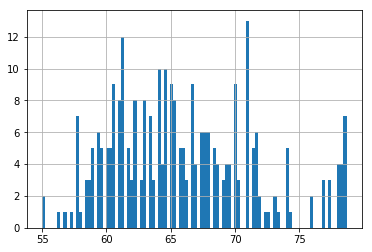

In [125]:
noon_aqi['aqi_noon'].hist(bins=100)

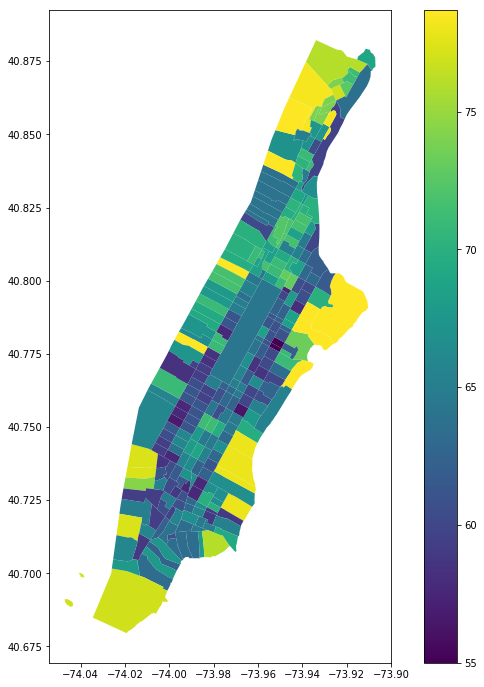

In [126]:
tracts.merge(noon_aqi, on='region_id').plot(column='aqi_noon', figsize=(12, 12), legend=True)

In [179]:
combined = tracts.merge(noon_aqi, on='region_id')

In [180]:
style_fnc = lambda x: {'fillColor': '#ffffff',
                       'color':'#000000',
                       'fillOpacity': 0.1,
                       'weight': 0.1}
highlight_fnc = lambda x: {'fillColor': '#000000',
                           'color':'#000000',
                           'fillOpacity': 0.50,
                           'weight': 0.1}

In [181]:
x = combined.centroid.x.mean()
y = combined.centroid.y.mean()
f_map = folium.Map(location=[y, x], zoom_start=11, tiles='OpenStreetMap')

folium.Choropleth(
    geo_data=combined1,
    data=combined1,
    columns=['region_id', 'aqi_noon',],
    key_on='feature.properties.region_id',
    fill_color='YlOrRd',
    fill_opacity=0.95,
    line_opacity=0.15,
    legend_name='Noon_Aqi',
    bins=[55, 60, 65, 70, 75, 80, 85]
).add_to(f_map)

In [182]:
interact = folium.features.GeoJson(
    combined,
    style_function=style_fnc,
    control=False,
    highlight_function=highlight_fnc,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['region_id', 'aqi_noon'],
        aliases=['Blockgroup:','aqi_noon'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
    )
)
f_map.add_child(interact)
f_map.keep_in_front(interact)
folium.LayerControl().add_to(f_map)
f_map

In [183]:
f_map.save("noon.html")

EvenAir

In [102]:
even_30 = pd.read_csv('/Users/Albert/Jupyter/ManhattanAirEven18.csv')
even_31 = pd.read_csv('/Users/Albert/Jupyter/ManhattanAir31Even.csv')
even_01 = pd.read_csv('/Users/Albert/Jupyter/ManhattanAir01Even.csv')

In [103]:
even_30['aqi'] = even_30.rename(columns = {'aqi':'aqi30'}, inplace=True)
even_31['aqi'] = even_31.rename(columns = {'aqi':'aqi31'}, inplace=True)
even_01['aqi'] = even_01.rename(columns = {'aqi':'aqi01'}, inplace=True)

In [104]:
even = pd.DataFrame()

In [105]:
even = even_30.merge(even_31, on='region_id')
even = even.merge(even_01, on='region_id')

In [106]:
cols = ['region_id','aqi30','aqi31','aqi01']

In [107]:
even = even[cols]

In [108]:
even_aqi = pd.DataFrame()

In [109]:
even_aqi = even.set_index('region_id').mean(axis=1).rename('aqi_even').reset_index()

In [110]:
even_aqi['region_id'] = even_aqi['region_id'].astype(str)

In [111]:
even_aqi.head(10)

region_id   aqi_even
0  36061002400  71.666667
1  36061011202  66.333333
2  36061004400  66.000000
3  36061003900  67.000000
4  36061006000  71.666667
5  36061009200  65.333333
6  36061027300  69.333333
7  36061031100  59.000000
8  36061003200  70.000000
9  36061001502  67.333333

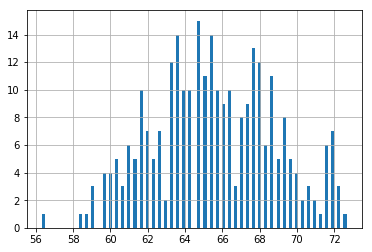

In [141]:
even_aqi['aqi_even'].hist(bins=100)

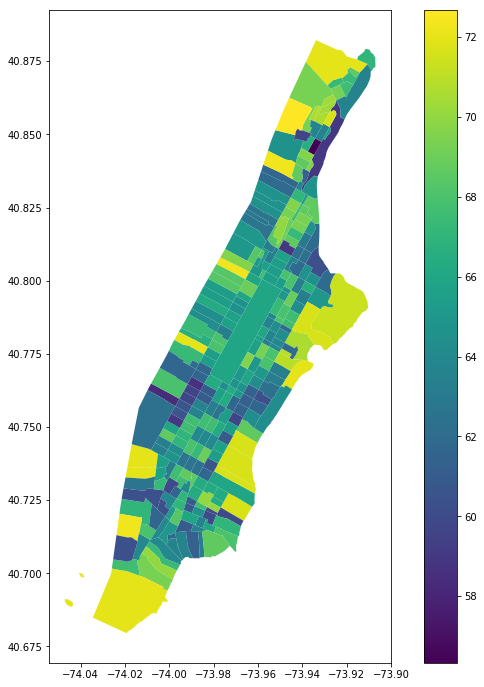

In [142]:
tracts.merge(even_aqi, on='region_id').plot(column='aqi_even', figsize=(12, 12), legend=True)

In [190]:
combined = tracts.merge(even_aqi, on='region_id')

In [191]:
style_fnc = lambda x: {'fillColor': '#ffffff',
                       'color':'#000000',
                       'fillOpacity': 0.1,
                       'weight': 0.1}
highlight_fnc = lambda x: {'fillColor': '#000000',
                           'color':'#000000',
                           'fillOpacity': 0.50,
                           'weight': 0.1}

In [192]:
x = combined.centroid.x.mean()
y = combined.centroid.y.mean()
f_map = folium.Map(location=[y, x], zoom_start=11, tiles='OpenStreetMap')

folium.Choropleth(
    geo_data=combined1,
    data=combined1,
    columns=['region_id', 'aqi_even',],
    key_on='feature.properties.region_id',
    fill_color='YlOrRd',
    fill_opacity=0.95,
    line_opacity=0.15,
    legend_name='Evening_Aqi',
    bins=[55, 60, 65, 70, 75, 80, 85]
).add_to(f_map)

In [193]:
interact = folium.features.GeoJson(
    combined,
    style_function=style_fnc,
    control=False,
    highlight_function=highlight_fnc,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['region_id', 'aqi_even'],
        aliases=['Blockgroup:','aqi_even'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
    )
)
f_map.add_child(interact)
f_map.keep_in_front(interact)
folium.LayerControl().add_to(f_map)
f_map

In [194]:
f_map.save("even.html")

NightAir

In [112]:
night_30 = pd.read_csv('/Users/Albert/Jupyter/ManhattanAirNight23.csv')
night_31 = pd.read_csv('/Users/Albert/Jupyter/ManhattanAir31Night.csv')
night_01 = pd.read_csv('/Users/Albert/Jupyter/ManhattanAir01Night.csv')

In [113]:
night_30['aqi'] = night_30.rename(columns = {'aqi':'aqi30'}, inplace=True)
night_31['aqi'] = night_31.rename(columns = {'aqi':'aqi31'}, inplace=True)
night_01['aqi'] = night_01.rename(columns = {'aqi':'aqi01'}, inplace=True)

In [114]:
night = pd.DataFrame()

In [115]:
night = night_30.merge(night_31, on='region_id')
night = night.merge(night_01, on='region_id')

In [116]:
cols = ['region_id','aqi30','aqi31','aqi01']

In [117]:
night = night[cols]

In [118]:
night_aqi = pd.DataFrame()

In [119]:
night_aqi = night.set_index('region_id').mean(axis=1).rename('aqi_night').reset_index()

In [120]:
night_aqi['region_id'] = night_aqi['region_id'].astype(str)

In [121]:
night_aqi.head(10)

region_id  aqi_night
0  36061002400  71.333333
1  36061011202  68.000000
2  36061004400  65.666667
3  36061003900  60.333333
4  36061006000  71.333333
5  36061009200  59.333333
6  36061027300  71.333333
7  36061031100  57.000000
8  36061003200  63.000000
9  36061001502  64.666667

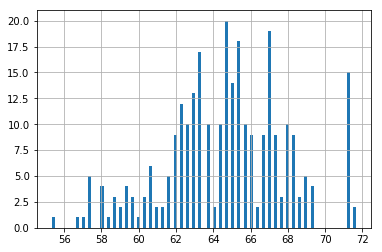

In [149]:
night_aqi['aqi_night'].hist(bins=100)

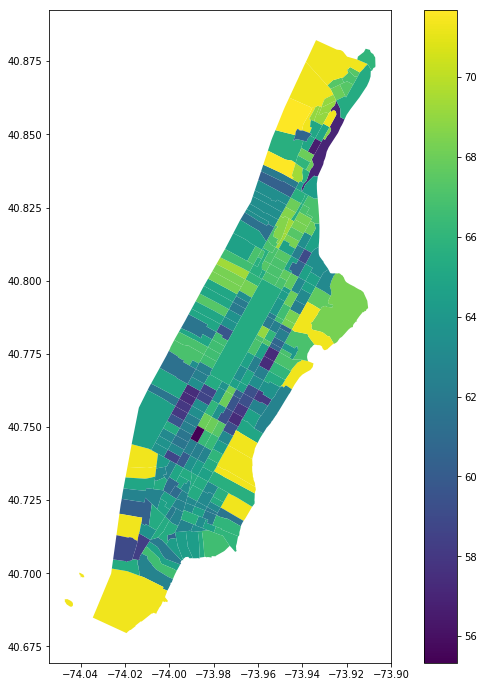

In [151]:
tracts.merge(night_aqi, on='region_id').plot(column='aqi_night', figsize=(12, 12), legend=True)

In [195]:
combined = tracts.merge(night_aqi, on='region_id')

In [196]:
style_fnc = lambda x: {'fillColor': '#ffffff',
                       'color':'#000000',
                       'fillOpacity': 0.1,
                       'weight': 0.1}
highlight_fnc = lambda x: {'fillColor': '#000000',
                           'color':'#000000',
                           'fillOpacity': 0.50,
                           'weight': 0.1}

In [197]:
x = combined.centroid.x.mean()
y = combined.centroid.y.mean()
f_map = folium.Map(location=[y, x], zoom_start=11, tiles='OpenStreetMap')

folium.Choropleth(
    geo_data=combined1,
    data=combined1,
    columns=['region_id', 'aqi_night',],
    key_on='feature.properties.region_id',
    fill_color='YlOrRd',
    fill_opacity=0.95,
    line_opacity=0.15,
    legend_name='Night_Aqi',
    bins=[55, 60, 65, 70, 75, 80, 85]
).add_to(f_map)

In [198]:
interact = folium.features.GeoJson(
    combined,
    style_function=style_fnc,
    control=False,
    highlight_function=highlight_fnc,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['region_id', 'aqi_night'],
        aliases=['Blockgroup:','aqi_night'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
    )
)
f_map.add_child(interact)
f_map.keep_in_front(interact)
folium.LayerControl().add_to(f_map)
f_map

In [199]:
f_map.save("night.html")